In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('madfhantr.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].apply(LabelEncoder().fit_transform)

In [7]:
df

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1          0       1        1           1          0              0   
2          1       1        1           0          0              1   
3          2       1        1           0          1              0   
4          3       1        0           0          0              0   
5          4       1        1           2          0              1   
..       ...     ...      ...         ...        ...            ...   
609      475       0        0           0          0              0   
610      476       1        1           3          0              0   
611      477       1        1           1          0              0   
612      478       1        1           2          0              0   
613      479       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1                247                 50          76                 7   
2                112                  0          23                 7   
3                 74                135          68                 7   
4                305                  0          89                 7   
5                281                196         159                 7   
..               ...                ...         ...               ...   
609              101                  0          26                 7   
610              219                  0           7                 4   
611              344                  3         154                 7   
612              336                  0         126                 7   
613              247                  0          81                 7   

     Credit_History  Property_Area  Loan_Status  
1                 1              0            0  
2                 1              2            1  
3                 1              2            1  
4                 1              2            1  
5                 1              2            1  
..              ...            ...          ...  
609               1              0            1  
610               1              0            1  
611               1              2            1  
612               1              2            1  
613               0              1            0  

[480 rows x 13 columns]

In [8]:
X = df.iloc[:, :-1]
y = df[['Loan_Status']]

In [9]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
model = DecisionTreeClassifier()
model.fit(trainX, trainY)

DecisionTreeClassifier()

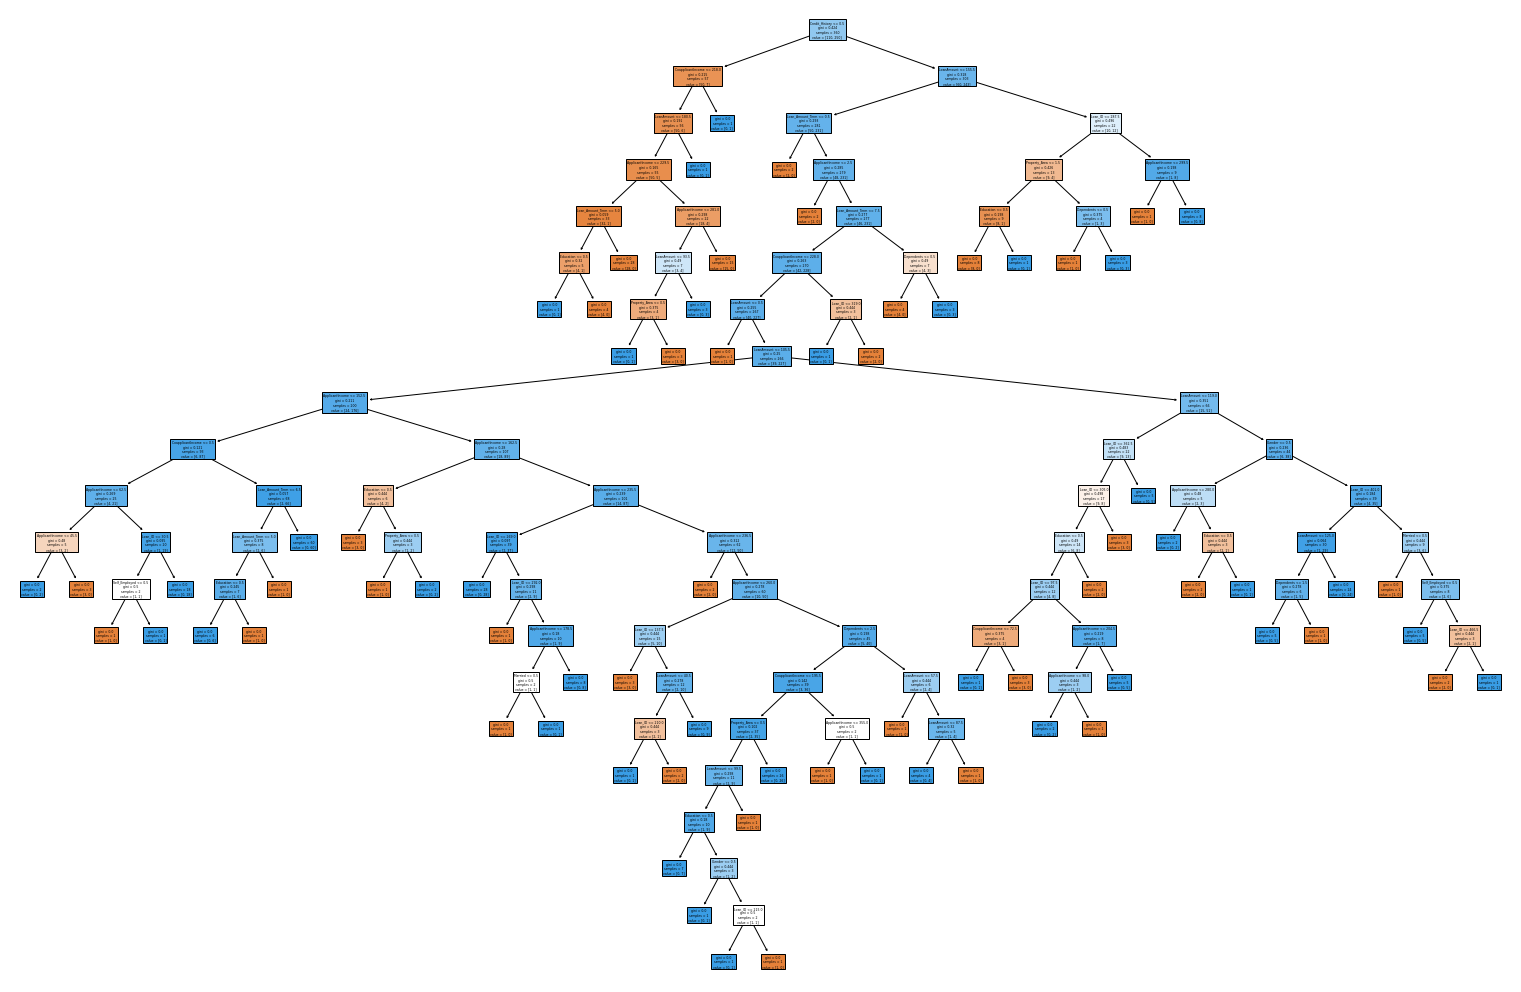

In [11]:
plt.figure(figsize=(9*3, 6*3))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()

In [12]:
y_ = model.predict(testX)

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [14]:
print(classification_report(testY, y_))

              precision    recall  f1-score   support

           0       0.54      0.39      0.45        38
           1       0.75      0.84      0.79        82

    accuracy                           0.70       120
   macro avg       0.64      0.62      0.62       120
weighted avg       0.68      0.70      0.69       120



In [15]:
ConfusionMatrixDisplay(confusion_matrix(testY, y_)).plot()

In [16]:
print(accuracy_score(testY, y_))

0.7
